<a href="https://colab.research.google.com/github/sgulyano/mat202/blob/main/lab4extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT-202 Lab 4 Extra: Background Estimation

CMKL University

By Sarun Gulyanon


### Goal

Introduce students to the concept of background estimation, which can be used to isolate and detect moving objects in an image sequence.

### Outline

In this lab, students will explore the temporal median filter method for background estimation. This technique estimates the static background across multiple frames, allowing the background to be subtracted from each image to obtain the foreground, which can then be used for tasks such as object detection or motion analysis.

----

## 0. Getting Sample Video

In [1]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=11iElvYYwinCyy4pPnQogZjyfHdWErkCU' -O vdo.mp4

--2025-10-16 02:28:59--  https://drive.google.com/uc?export=download&id=11iElvYYwinCyy4pPnQogZjyfHdWErkCU
Resolving drive.google.com (drive.google.com)... 74.125.137.100, 74.125.137.102, 74.125.137.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=11iElvYYwinCyy4pPnQogZjyfHdWErkCU&export=download [following]
--2025-10-16 02:28:59--  https://drive.usercontent.google.com/download?id=11iElvYYwinCyy4pPnQogZjyfHdWErkCU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227143 (4.0M) [video/mp4]
Saving to: ‘vdo.mp4’

vdo.mp4             100%[===================>]   4.03M  20.8MB/s    in 0.2s    

2025-10

Read video frames using OpenCV.

In [2]:
import cv2
import numpy as np

video_path = "vdo.mp4"
# num_frames = 30  # number of frames used for median filter (adjust as needed)

# --- Open the video ---
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Cannot open video file.")
    exit()

In [3]:
frames = []
# --- Display results ---
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)


Sanity Check: Show sample frames in the video.

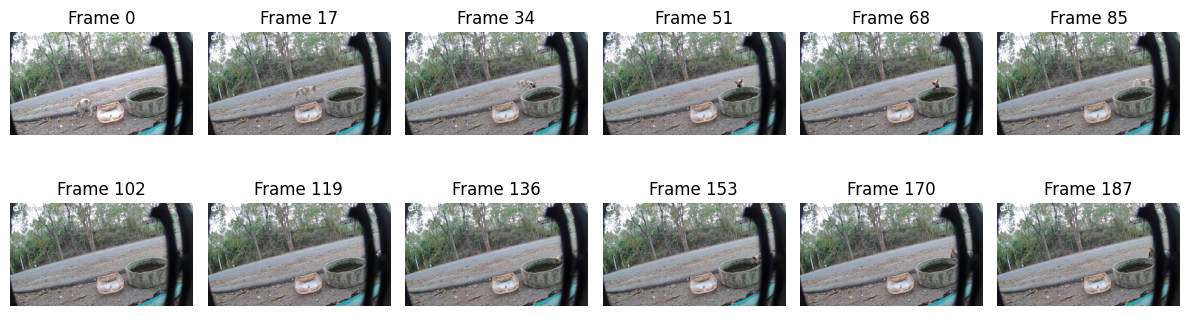

In [13]:
import matplotlib.pyplot as plt

frames_to_plot = 12
frames_step = len(frames)//frames_to_plot
fig, axes = plt.subplots(2, 6, figsize=(12, 4))
axes = axes.ravel()

for i in range(frames_to_plot):
    frame_rgb = cv2.cvtColor(frames[i*frames_step], cv2.COLOR_BGR2RGB)
    axes[i].imshow(frame_rgb)
    axes[i].set_title(f'Frame {i*frames_step}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 1. Temporal Median Filter

The temporal median filter estimates the background of a video by taking the median value of each pixel across multiple frames. This removes moving objects and keeps only the static background. This technique can remove transient or moving objects and assume that the background remains relatively constant over time.

In [5]:
bg_frame = np.median(frames, axis=0).astype(dtype=np.uint8)

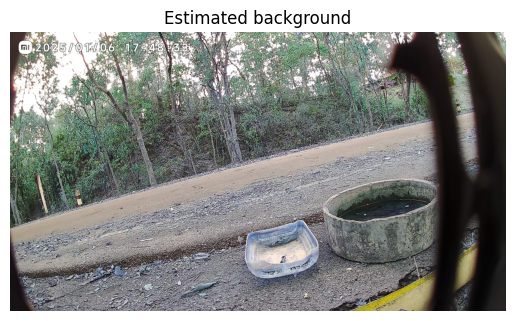

In [11]:
plt.imshow(bg_frame)
plt.axis('off')
plt.title('Estimated background')
plt.show()

Compute the difference and perform thresholding to get the foreground mask.

In [7]:
fg_mask = cv2.absdiff(frames[0], bg_frame)
fg_gray = cv2.cvtColor(fg_mask, cv2.COLOR_BGR2GRAY)
_, fg_thresh = cv2.threshold(fg_gray, 70, 255, cv2.THRESH_BINARY) # Using 70 as threshold

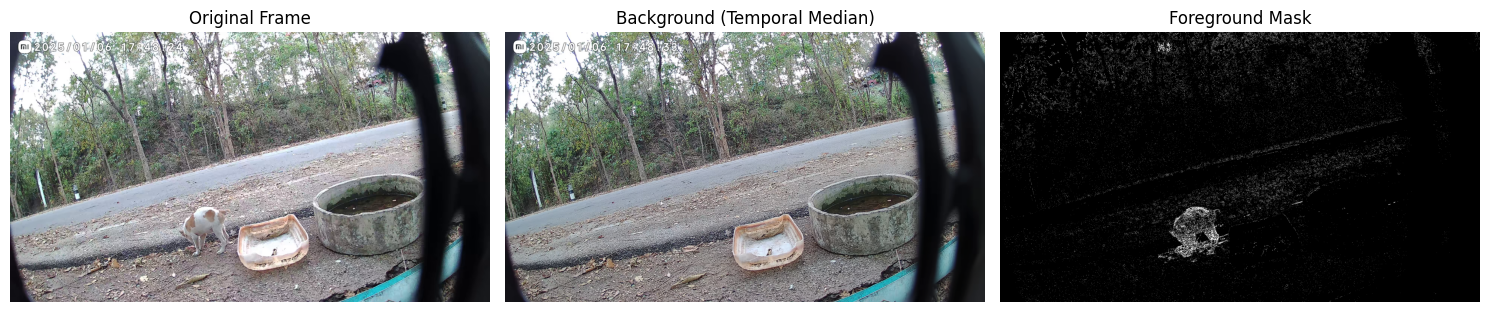

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the original frame
axes[0].imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Frame")
axes[0].axis('off')

# Display the background frame
axes[1].imshow(cv2.cvtColor(bg_frame, cv2.COLOR_BGR2RGB))
axes[1].set_title("Background (Temporal Median)")
axes[1].axis('off')

# Display the foreground mask
axes[2].imshow(fg_thresh, cmap='gray') # Foreground mask is grayscale
axes[2].set_title("Foreground Mask")
axes[2].axis('off')

plt.tight_layout()
plt.show()

----